## Clustering the Countries by using K-Means for HELP International

HELP International is an international humanitarian Non-Government Organizations committed to fighting poverty and providing basic facilities and assistance to people in underdeveloped countries during disasters.

HELP International has raised approximately $10 Milion. The CEO's need to decide to help the countries that need the most help. Socioeconomics and health factors determine the overall development of the country. So lets search the countries that needed most.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Searching for Socioeconomic Factors

## Data Reading

In [2]:
df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


This data includes country columns, child mortality, exports, health, imports, income, country inflation, life expectancy, total fertility, GDP per capita. There are 10 columns (columns) with 167 rows (rows).

Feature column explanation:

Negara : Country name

Kematian_anak : Death of children under 5 years old per 1000 births

Ekspor : Exports of goods and services per capita

Kesehatan : Total health expenditure per capita

Impor : Imports of goods and services per capita

Pendapatan: Net income per person

Inflasi: A measure of the annual growth rate of Total GDP

Harapan_hidup: The average number of years a newborn child would live if the current death pattern remained the same

Jumlah_fertiliti: The number of children that would be born to each woman if the current fertility rate remained the same

GDPperkapita: GDP per capita. Calculated as Total GDP divided by the total population.

In [3]:
df.shape

(167, 10)

There are 167 Rows and 10 Columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


This data frame does not contain missing values. In the country column, the data type is object, while the Income and GDP per capita columns are int64, and the rest are float64. with a total of 7 columns of float64, 2 columns of int64, and 1 column of object. Because there are no missing values in this data, there is no need to handle missing values.

In [5]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In the rows count, it can be seen that according to the data info, which is 167 rows with all non-null. In the mean index, the average data from all columns in the data is presented. std means the standard deviation of the data, min is the minimum value of data in each column, 25% is a value of the 1st quartile of each column, 50% is the value of the 2nd quartile of each column, 75% is the 3rd quartile value of each column, and max is the maximum value obtained in each column in this international HELP data.

## EDA

### Multivariate Analysis

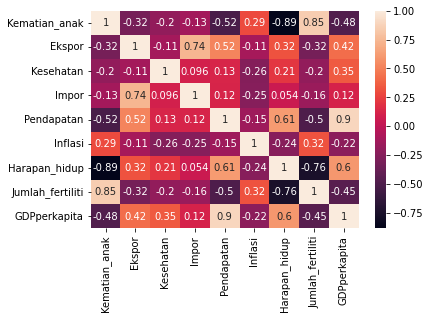

In [6]:
sns.heatmap(df.corr(), annot=True, fmt='.2g');

If we look at the Heatmap correlation, the Pendapatan and GDPperkapita shows up with the highest correlation score for socioeconomic factors.

## Handling Outliers

<AxesSubplot:xlabel='GDPperkapita'>

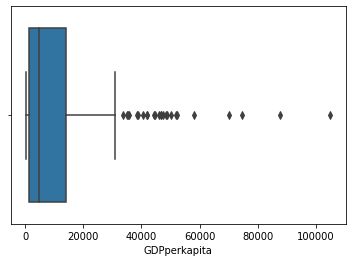

In [7]:
sns.boxplot(data=df, x='GDPperkapita')

This is a GDPperkapita outliers, so this should be removed

<AxesSubplot:xlabel='Pendapatan'>

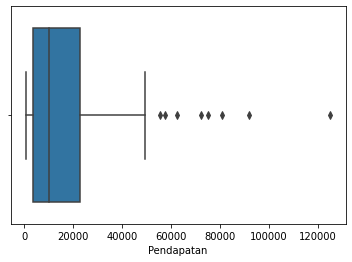

In [8]:
sns.boxplot(data=df, x='Pendapatan')

This is a Pendapatan outliers, and this should be removed too

### Interquartile Range

In [9]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[(df<(Q3+(1.5*IQR)))]
  return df_final

I think if i remove the outliers with the Interquartile Range, i should not remove the lower bound, lower bound is a outlier that outside the estimated value. So i just remove the upper bound only

In [10]:
df2 = remove_outlier(df[['Pendapatan', 'GDPperkapita']])

df2.dropna(axis=0, inplace=True)
df2

,Pendapatan,GDPperkapita
0,1610.0,553.0
1,9930.0,4090.0
2,12900.0,4460.0
3,5900.0,3530.0
4,19100.0,12200.0
...,...,...
162,2950.0,2970.0
163,16500.0,13500.0
164,4490.0,1310.0
165,4480.0,1310.0


After removing outliers, it is only 142 rows left, so outliers eliminate 25 rows.

<AxesSubplot:xlabel='Pendapatan'>

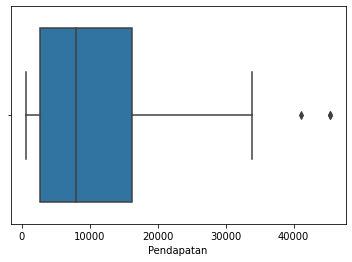

In [11]:
sns.boxplot(data=df2, x='Pendapatan')

This is a Pendapatan after removing outliers

<AxesSubplot:xlabel='GDPperkapita'>

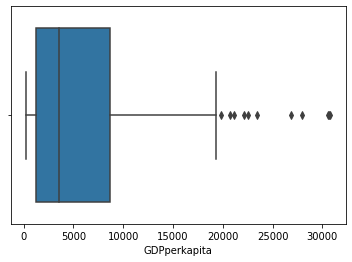

In [12]:
sns.boxplot(data=df2, x='GDPperkapita')

This is a GDPperkapita after removing outliers

## Clustering Pendapatan dan GDPperkapita

In [13]:
#feature scaling

sc = StandardScaler()
df_std = sc.fit_transform(df2)

I choose the standard scaler method for transform the data to have a mean value 0 and standard deviation of 1. And to standardize the data to apply the machine learning function (in this case K-Means Clustering) 

In [14]:
#clustering with KMeans

kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_

In [15]:
new_df = pd.DataFrame(data=df_std, columns=['Pendapatan', 'GDPperkapita'])
new_df['label1_kmeans'] = labels1
new_df

,Pendapatan,GDPperkapita,label1_kmeans
0,-0.945783,-0.816938,0
1,-0.101991,-0.317709,0
2,0.199219,-0.265485,0
3,-0.510703,-0.396750,0
4,0.828006,0.826975,1
...,...,...,...
137,-0.809884,-0.475791,0
138,0.564321,1.010463,1
139,-0.653701,-0.710091,0
140,-0.654715,-0.710091,0


So here is the data after the standardization and KMeans

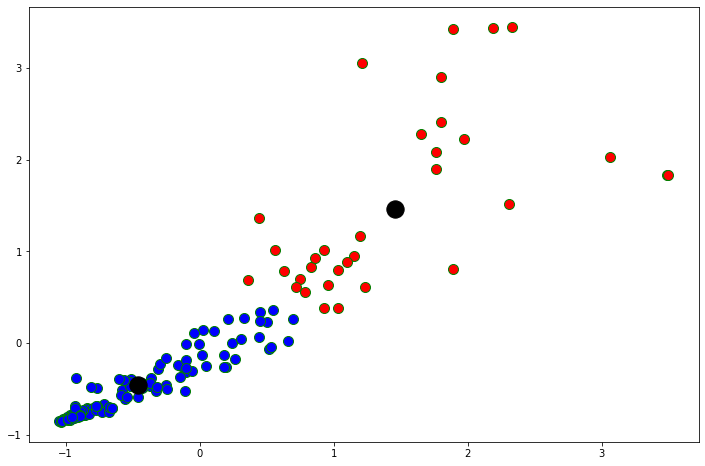

In [16]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Pendapatan'][new_df.label1_kmeans==0], new_df['GDPperkapita'][new_df.label1_kmeans==0], c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label1_kmeans==1], new_df['GDPperkapita'][new_df.label1_kmeans==1], c='red', s=100, edgecolors='green')

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,0], c='k', s=300)

plt.show()

If we look at the graph, cluster 0 is what i need (in the blue dots)

### Elbow Method

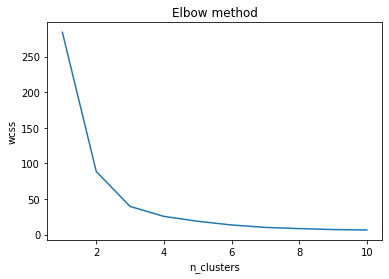

In [17]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

Elbow method is to search the right number of clusters, in this case i use n_clusters = 3, because it represent the remaining values.

In [18]:
kmeans2 = KMeans(n_clusters = 3, init='k-means++', random_state=42)
kmeans2.fit(df_std)
labels2 = kmeans2.labels_


In [19]:
new_df['label2_kmeans'] = labels2
new_df

,Pendapatan,GDPperkapita,label1_kmeans,label2_kmeans
0,-0.945783,-0.816938,0,0
1,-0.101991,-0.317709,0,0
2,0.199219,-0.265485,0,2
3,-0.510703,-0.396750,0,0
4,0.828006,0.826975,1,2
...,...,...,...,...
137,-0.809884,-0.475791,0,0
138,0.564321,1.010463,1,2
139,-0.653701,-0.710091,0,0
140,-0.654715,-0.710091,0,0


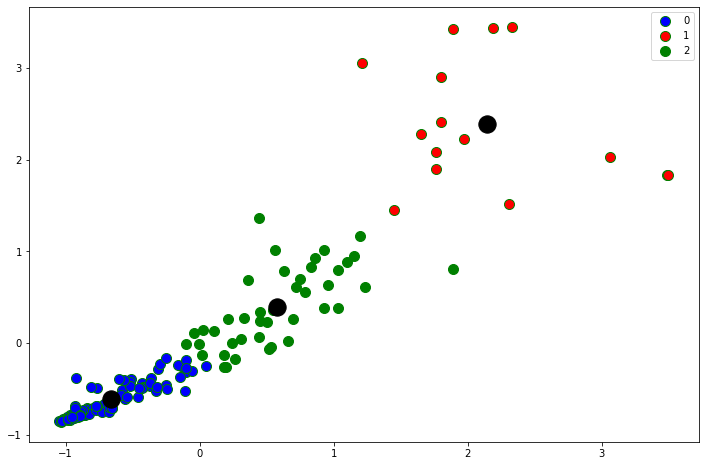

In [20]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Pendapatan'][new_df.label2_kmeans==0], new_df['GDPperkapita'][new_df.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label2_kmeans==1], new_df['GDPperkapita'][new_df.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label2_kmeans==2], new_df['GDPperkapita'][new_df.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.legend()
plt.show()

So after choose the n_clusters and running it, and the result that are 3 clusters, with blue means cluster 1, green means cluster 2, and the red means cluster 3.

### Silhouette Score

In [21]:
print(silhouette_score(df_std, labels= labels1))
print(silhouette_score(df_std, labels= labels2))

0.6547621766577557
0.6156187054467405


After doing the K-Means Clustering, compare the silhouette coefficient between n_clusters = 2 and n_clusters = 3. The n_clusters = 2 shows up with 0.6548 bigger than n_clusters = 3 with the value 0.6156, so the optimal value for silhouette score is the number of clusters 2.

## Inverse Transform

In [22]:
kmeansa = KMeans(n_clusters = 2, init='k-means++',random_state=42)
kmeansa.fit(sc.inverse_transform(df_std))
labelsa = kmeansa.labels_
labelsa

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [23]:
new_df1 = pd.DataFrame(data=sc.inverse_transform(df_std), columns=['Pendapatan', 'GDPperkapita'])
new_df1['label1_kmeans'] = labelsa
new_df1

,Pendapatan,GDPperkapita,label1_kmeans
0,1610.0,553.0,0
1,9930.0,4090.0,0
2,12900.0,4460.0,0
3,5900.0,3530.0,0
4,19100.0,12200.0,1
...,...,...,...
137,2950.0,2970.0,0
138,16500.0,13500.0,1
139,4490.0,1310.0,0
140,4480.0,1310.0,0


The inverse transform is to get back the value of each features. After doing standard scaling, you have standardize value. After that you should inverse the values to get back to the original values to pairing the original dataframe.

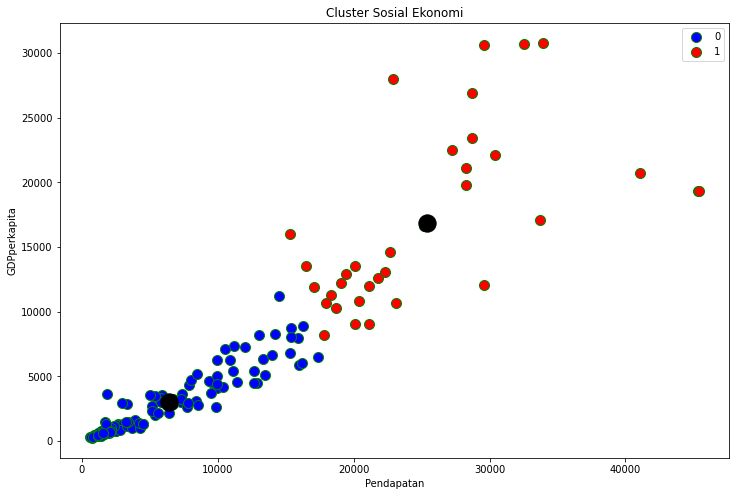

In [24]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['Pendapatan'][new_df1.label1_kmeans == 0], new_df1['GDPperkapita'][new_df1.label1_kmeans == 0], c='blue', label='0', s=100, edgecolor='green')
plt.scatter(new_df1['Pendapatan'][new_df1.label1_kmeans == 1], new_df1['GDPperkapita'][new_df1.label1_kmeans == 1], c='red', label='1', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )

plt.legend()
plt.title('Cluster Sosial Ekonomi')
plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.show()

## Merging Main Data

In [25]:
df_gabung = pd.merge(df, new_df1, how='inner')

df_gabung['label1_kmeans'] = df_gabung['label1_kmeans'].astype('object')
df_gabung

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
129,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
130,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
131,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
132,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


Merging after the inverse transform data, inner join the original data. And you will get the label kmeans on the right side. It shows us what country that inside the label kmeans. In this case, i will use the label kmeans = 0.

## Filtering

In [26]:
sosial_ekonomi = df_gabung[df_gabung['label1_kmeans']==0]
sosial_ekonomi

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0
...,...,...,...,...,...,...,...,...,...,...,...
128,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0
129,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
131,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
132,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


Why i choose the label kmeans = 0? That because i want to choose the most needed country that HELP NGO can see from the socioeconomic factors with the smallest Pendapatan and GDPperkapita.

In [27]:
sosial_ekonomi.sort_values(by=['Pendapatan'])[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans
32,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
72,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
22,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
26,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0
88,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0
77,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
53,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,0
120,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,0
106,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0
101,Rwanda,63.6,12.00,10.50,30.0,1350,2.61,64.6,4.51,563,0


I want to minimize the country, to shows only 10 country with the smallest Pendapatan.

# Searching For Health Care Factors

## EDA

### Multivariate Analysis

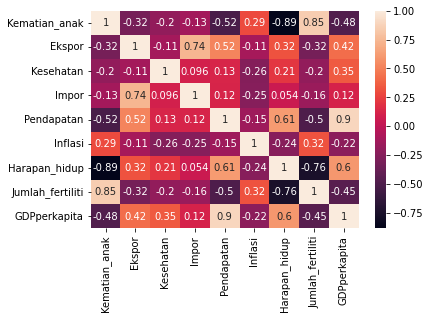

In [28]:
sns.heatmap(df.corr(), annot=True, fmt='.2g');

If we look at the Heatmap correlation, the Pendapatan and GDPperkapita shows up with the highest correlation score for socioeconomic factors.

## Handling Outliers

<AxesSubplot:xlabel='Kematian_anak'>

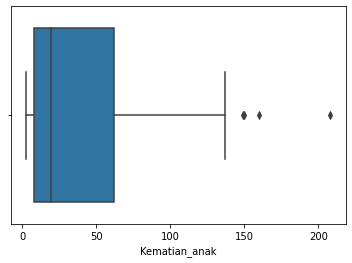

In [29]:
sns.boxplot(data=df, x='Kematian_anak')

This is a Kematian_anak outliers, so this should be removed

<AxesSubplot:xlabel='Harapan_hidup'>

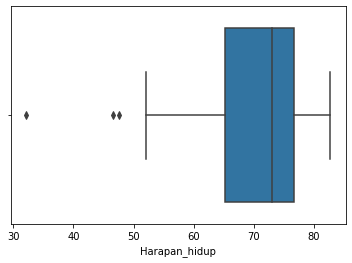

In [30]:
sns.boxplot(data=df, x='Harapan_hidup')

This is a Harapan_hidup outliers, and this should be removed too

In [31]:
df3 = remove_outlier(df[['Kematian_anak', 'Harapan_hidup']])

df3.dropna(axis=0, inplace=True)
df3

,Kematian_anak,Harapan_hidup
0,90.2,56.2
1,16.6,76.3
2,27.3,76.5
3,119.0,60.1
4,10.3,76.8
...,...,...
162,29.2,63.0
163,17.1,75.4
164,23.3,73.1
165,56.3,67.5


After removing outliers, it is only 163 rows left, so outliers eliminate 4 rows.

<AxesSubplot:xlabel='Kematian_anak'>

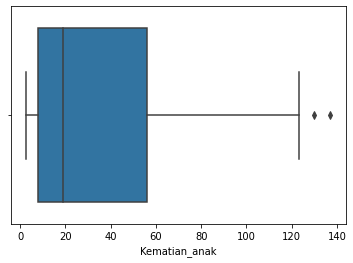

In [32]:
sns.boxplot(data=df3, x='Kematian_anak')

This is a Kematian_anak after removing outliers

<AxesSubplot:xlabel='Harapan_hidup'>

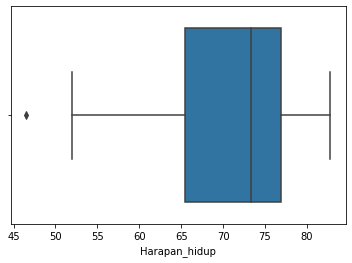

In [33]:
sns.boxplot(data=df3, x='Harapan_hidup')

This is a Harapan_hidup after removing outliers

## Clustering Child Mortality and Life Expectancy

In [34]:
sc = StandardScaler()
df_std3 = sc.fit_transform(df3)

Same as i searched the socioeconomic factors, I choose the standard scaler method for transform the data to have a mean value 0 and standard deviation of 1. And to standardize the data to apply the machine learning function (in this case K-Means Clustering) 

In [35]:
kmeans3 = KMeans(n_clusters = 2, random_state=42).fit(df_std3)
labels3 = kmeans3.labels_
labels3

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1])

In [36]:
new_df3 = pd.DataFrame(data=df_std3, columns=['Kematian_anak', 'Harapan_hidup'])
new_df3['label3_kmeans'] = labels3
new_df3

,Kematian_anak,Harapan_hidup,label3_kmeans
0,1.572536,-1.847087,1
1,-0.528639,0.642161,0
2,-0.223169,0.666930,0
3,2.394736,-1.364098,1
4,-0.708495,0.704083,0
...,...,...,...
158,-0.168927,-1.004953,1
159,-0.514365,0.530702,0
160,-0.337364,0.245863,0
161,0.604740,-0.447659,1


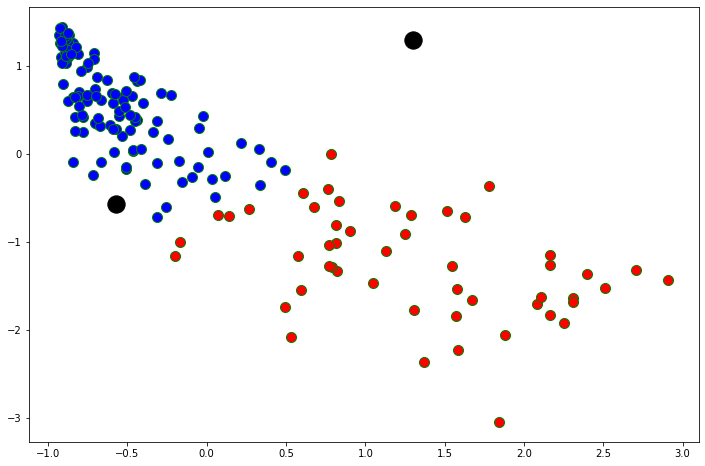

In [37]:
plt.figure(figsize=(12,8))

plt.scatter(new_df3['Kematian_anak'][new_df3.label3_kmeans==0], new_df3['Harapan_hidup'][new_df3.label3_kmeans==0], c='blue', s=100, edgecolors='green')
plt.scatter(new_df3['Kematian_anak'][new_df3.label3_kmeans==1], new_df3['Harapan_hidup'][new_df3.label3_kmeans==1], c='red', s=100, edgecolors='green')

plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,0], c='k', s=300)

plt.show()

If we look at the graph, cluster 1 is what i need (in the red dots)

### Elbow Method

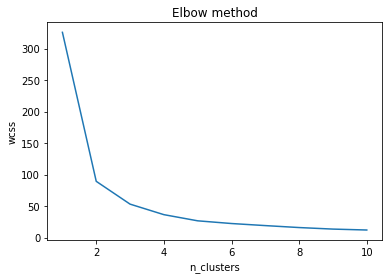

In [38]:
wcss1 = []
for i in range(1,11):
  kmeans3 = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans3.fit(df_std3)
  wcss1.append(kmeans3.inertia_)

plt.plot(range(1,11), wcss1)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

Elbow method is to search the right number of clusters, in this case i use n_clusters = 3, because it represent the remaining values.

In [39]:
kmeans4 = KMeans(n_clusters = 3, init='k-means++', random_state=42)
kmeans4.fit(df_std3)
labels4 = kmeans4.labels_

In [40]:
new_df3['label4_kmeans'] = labels4
new_df3

,Kematian_anak,Harapan_hidup,label3_kmeans,label4_kmeans
0,1.572536,-1.847087,1,1
1,-0.528639,0.642161,0,2
2,-0.223169,0.666930,0,2
3,2.394736,-1.364098,1,1
4,-0.708495,0.704083,0,2
...,...,...,...,...
158,-0.168927,-1.004953,1,0
159,-0.514365,0.530702,0,2
160,-0.337364,0.245863,0,0
161,0.604740,-0.447659,1,0


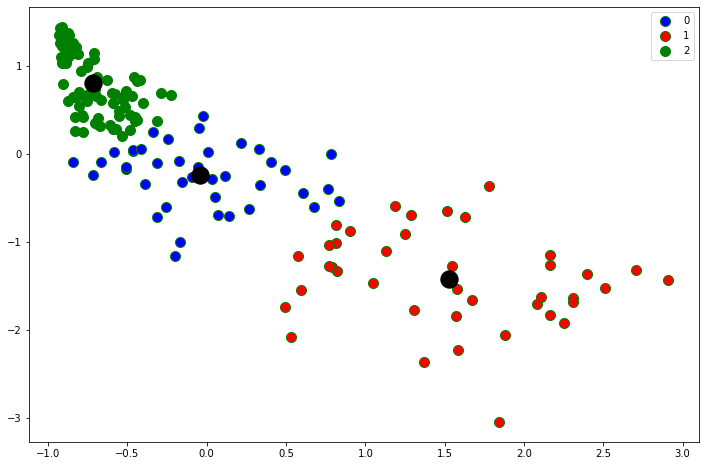

In [41]:
plt.figure(figsize=(12,8))

plt.scatter(new_df3['Kematian_anak'][new_df3.label4_kmeans==0], new_df3['Harapan_hidup'][new_df3.label4_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df3['Kematian_anak'][new_df3.label4_kmeans==1], new_df3['Harapan_hidup'][new_df3.label4_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df3['Kematian_anak'][new_df3.label4_kmeans==2], new_df3['Harapan_hidup'][new_df3.label4_kmeans==2], label='2', c='green', s=100, edgecolors='green')

plt.scatter(kmeans4.cluster_centers_[:,0], kmeans4.cluster_centers_[:,1], c='k', s=300)
plt.legend()
plt.show()

So after choose the n_clusters and running it, and the result that are 3 clusters, with blue means cluster 1, red means cluster 2, and the green means cluster 3.

In [42]:
print(silhouette_score(df_std3, labels= labels3))
print(silhouette_score(df_std3, labels= labels4))

0.6378683945297146
0.5078271946924935


After doing the K-Means Clustering, compare the silhouette coefficient between n_clusters = 2 and n_clusters = 3. The n_clusters = 2 shows up with 0.6379 bigger than n_clusters = 3 with the value 0.5078, so the optimal value for silhouette score is the number of clusters 2.

## Inverse Transform

In [43]:
kmeansd = KMeans(n_clusters = 2, init='k-means++',random_state=42).fit(df_std3)
kmeansd.fit(sc.inverse_transform(df_std3))
labelsd = kmeansd.labels_
labelsd

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1])

In [44]:
new_df3 = pd.DataFrame(data=sc.inverse_transform(df_std3), columns=['Kematian_anak', 'Harapan_hidup'])
new_df3['label4_kmeans'] = labelsd
new_df3

,Kematian_anak,Harapan_hidup,label4_kmeans
0,90.2,56.2,1
1,16.6,76.3,0
2,27.3,76.5,0
3,119.0,60.1,1
4,10.3,76.8,0
...,...,...,...
158,29.2,63.0,0
159,17.1,75.4,0
160,23.3,73.1,0
161,56.3,67.5,1


The inverse transform is to get back the value of each features. After doing standard scaling, you have standardize value. After that you should inverse the values to get back to the original values to pairing the original dataframe.

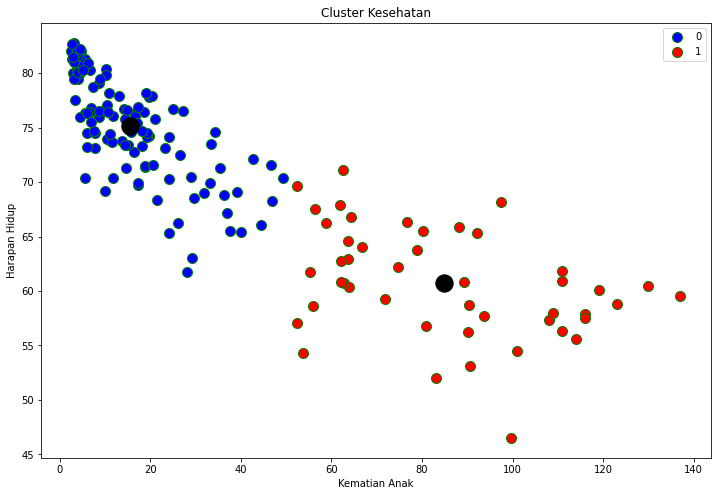

In [45]:
plt.figure(figsize=(12,8))

plt.scatter(new_df3['Kematian_anak'][new_df3.label4_kmeans == 0], new_df3['Harapan_hidup'][new_df3.label4_kmeans == 0], c='blue', label='0', s=100, edgecolor='green')
plt.scatter(new_df3['Kematian_anak'][new_df3.label4_kmeans == 1], new_df3['Harapan_hidup'][new_df3.label4_kmeans == 1], c='red', label='1', s=100, edgecolor='green')

plt.scatter(kmeansd.cluster_centers_[:, 0],kmeansd.cluster_centers_[:, 1], c='k', s=300 )

plt.legend()
plt.title('Cluster Kesehatan')
plt.xlabel('Kematian Anak')
plt.ylabel('Harapan Hidup')
plt.show()

## Merging Main Data

In [46]:
df_gabung2 = pd.merge(df, new_df3, how='inner')

df_gabung2['label4_kmeans'] = df_gabung2['label4_kmeans'].astype('object')
df_gabung2

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label4_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0
...,...,...,...,...,...,...,...,...,...,...,...
113,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
114,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
115,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
116,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


Merging after the inverse transform data, inner join the original data. And you will get the label kmeans on the right side. It shows us what country that inside the label kmeans. In this case, i will use the label kmeans = 1.

In [47]:
kesehatan = df_gabung2[df_gabung2['label4_kmeans']==1]
kesehatan

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label4_kmeans
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,1
13,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,1
16,Botswana,52.5,43.600,8.30,51.3000,13300,8.920,57.1,2.88,6350,1
18,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,1
19,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,1
21,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,1
26,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,1
27,"Congo, Dem. Rep.",116.0,41.100,7.91,49.6000,609,20.800,57.5,6.54,334,1
28,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.700,60.4,4.95,2740,1


Why i choose the label kmeans = 1? That because i want to choose the most needed country that HELP NGO can see from the health care factors with the biggest child mortality and smallest life expectancy.

In [48]:
kesehatan.sort_values(by=['Kematian_anak'], ascending=False)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label4_kmeans
66,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708,1
79,Nigeria,130.0,25.3,5.07,17.4,5150,104.000,60.5,5.84,2330,1
78,Niger,123.0,22.2,5.16,49.1,814,2.550,58.8,7.49,348,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
18,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,1
27,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,1
46,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.970,55.6,5.05,547,1
13,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,1
29,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.390,56.3,5.27,1220,1
35,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100,1


I want to minimize the country, to shows only 10 country with the highest child mortality

# Conclusion

In [49]:
concl = pd.merge(sosial_ekonomi, kesehatan, how='outer')

concl['label1_kmeans'] = concl['label1_kmeans'].astype('object')
concl['label4_kmeans'] = concl['label4_kmeans'].astype('object')

In [50]:
concl = concl.loc[(concl['label1_kmeans']==0) & (concl['label4_kmeans']==1)]
concl

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label4_kmeans
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,0,1
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,0,1
9,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,0,1
13,Botswana,52.5,43.600,8.30,51.3000,13300,8.920,57.1,2.88,6350,0,1
16,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,0,1
17,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,0,1
19,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,0,1
25,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,0,1
26,"Congo, Dem. Rep.",116.0,41.100,7.91,49.6000,609,20.800,57.5,6.54,334,0,1
27,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.700,60.4,4.95,2740,0,1


I merge the label1_kmeans = 0 and label4_kmeans = 1 to focus what i searched, that is the country needs help most.

In [51]:
concl.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,41.000000,41.000000,41.000000,41.00000,41.00000,41.000000,41.000000,41.000000,41.000000
mean,82.012195,28.573634,5.992683,40.79429,3459.04878,9.583049,61.000000,4.759024,1671.609756
std,22.768895,18.837673,2.608045,16.40018,3504.31464,6.878614,4.719587,1.134200,2004.904198
min,52.400000,0.109000,1.970000,0.06590,609.00000,0.885000,52.000000,2.410000,231.000000
25%,62.600000,16.500000,4.410000,29.60000,1410.00000,3.870000,57.500000,4.080000,562.000000
50%,80.300000,23.800000,5.300000,40.30000,2090.00000,8.920000,60.700000,4.980000,967.000000
75%,97.400000,37.000000,7.650000,49.30000,3980.00000,12.500000,64.600000,5.430000,1350.000000
max,137.000000,85.100000,11.800000,92.60000,15400.00000,26.500000,71.100000,6.550000,8750.000000


Look at mean value of kematian anak, pendapatan, harapan hidup and GDPperkapita. I search the value below the means.

In [52]:
def under_mean(concl):
  um = concl.quantile(0.25)
  concl_final = concl[(concl<um)]
  return concl_final

In [53]:
concl_fix2 = concl.loc[(concl['Kematian_anak'])  > concl['Kematian_anak'].quantile(0.75) ]
concl_fix2

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label4_kmeans
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0,1
9,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,0,1
16,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,0,1
19,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,0,1
26,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,0,1
29,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.390,56.3,5.27,1220,0,1
41,Guinea,109.0,30.3,4.93,43.2,1190,16.100,58.0,5.34,648,0,1
42,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.970,55.6,5.05,547,0,1
61,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708,0,1
68,Mozambique,101.0,31.5,5.21,46.2,918,7.640,54.5,5.56,419,0,1


First, i search child mortality above the means rate of all countries

In [54]:
concl_fix33 = under_mean(concl_fix2[['Pendapatan', 'Harapan_hidup', 'GDPperkapita']])

concl_fix33.dropna(axis=0, inplace=True)
concl_fix33

,Pendapatan,Harapan_hidup,GDPperkapita
68,918.0,54.5,419.0


Last, i search the rest below the means rate of all countries, and look at the number of countries. I got number 68, it means Mozambique.

Conclusion :

I recommend to CEOs of HELP International that most needs country to help is Mozambique, with health care below means rate of all countries, and socioeconomics below means rate of all countries.